# Cats vs Dogs 

In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from Kaggle.



### Importing libraries:

In [14]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img


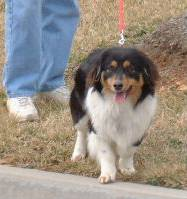

In [15]:
path = 'data/actual/train/dogs'
name = 'dog.2.jpg'
fullname = f'{path}/{name}'
load_img(fullname)


In [36]:
img = load_img(fullname, target_size=(150, 150))


In [17]:
x = np.array(img)
x.shape

(155, 155, 3)

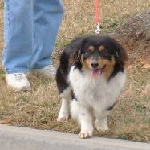

In [41]:
load_img(fullname, target_size=(150, 150))

Dog number 5

In [19]:
def make_model():

    inputs = keras.Input(shape=(150, 150, 3))

    conv = keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(150, 150, 3)
    )(inputs)



    pooling = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)

    vectors = keras.layers.Flatten()(pooling) # flatten the pooling 2d output

    inner = keras.layers.Dense(64, activation='relu')(vectors)

    outputs = keras.layers.Dense(1, activation='sigmoid')(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)

    loss = keras.losses.BinaryCrossentropy(from_logits=False)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    model.summary()

    return model


In [20]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/actual/train/',
    batch_size=20,
    target_size=(150, 150),
    #binary class mode
    class_mode='binary',
    shuffle=True
)


Found 20000 images belonging to 2 classes.


In [21]:

val_datagen = ImageDataGenerator(rescale=1./255)

val_ds = val_datagen.flow_from_directory(
    './data/actual/validation/',
    batch_size=20,
    target_size=(150, 150),
    # binary class mode
    class_mode='binary',
    shuffle=True
    )


Found 5000 images belonging to 2 classes.


In [22]:
model = make_model()  # refresh model


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 175232)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                11214912  
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                           

In [23]:

history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


Epoch 1/10
100/100 [==============================] - 3s 32ms/step - loss: 0.6917 - accuracy: 0.5300 - val_loss: 0.6938 - val_accuracy: 0.5030
Epoch 2/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6808 - accuracy: 0.5525 - val_loss: 0.6656 - val_accuracy: 0.6120
Epoch 3/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6733 - accuracy: 0.5780 - val_loss: 0.6851 - val_accuracy: 0.5540
Epoch 4/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6722 - accuracy: 0.5730 - val_loss: 0.6681 - val_accuracy: 0.5880
Epoch 5/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6596 - accuracy: 0.6070 - val_loss: 0.6679 - val_accuracy: 0.5870
Epoch 6/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6490 - accuracy: 0.6150 - val_loss: 0.6629 - val_accuracy: 0.5910
Epoch 7/10
100/100 [==============================] - 3s 31ms/step - loss: 0.6459 - accuracy: 0.6160 - val_loss: 0.6344 - val_accuracy: 0.6310

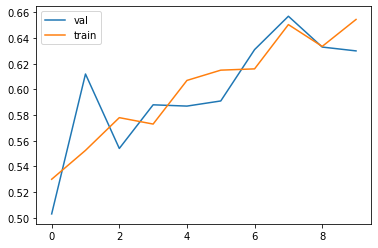

In [24]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()


In [25]:


training_accuracy = np.array(history.history['accuracy'])
val_accuracy = np.array(history.history['val_accuracy'])

print(f'Median of train accuracy: {np.median(training_accuracy)}')
print(f'Median of val accuracy: {np.median(training_accuracy)}')



Median of train accuracy: 0.6110000014305115
Median of val accuracy: 0.6110000014305115


In [26]:
# Q4

training_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

print(f'Standard deviation of training loss: {np.std(training_loss)}')
print(f'Standard deviation of val loss: {np.std(val_loss)}')


Standard deviation of training loss: 0.02266378304184231
Standard deviation of val loss: 0.02460064530433595


In [27]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [13]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)


Epoch 1/10


2021-12-05 21:30:48.783737: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204
2021-12-05 21:30:49.013543: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-05 21:30:49.014047: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-05 21:30:49.014090: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2021-12-05 21:30:49.014482: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2021-12-05 21:30:49.014537: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


100/100 [==============================] - 5s 37ms/step - loss: 0.6954 - accuracy: 0.5165 - val_loss: 0.6915 - val_accuracy: 0.5250
Epoch 2/10
100/100 [==============================] - 4s 36ms/step - loss: 0.6916 - accuracy: 0.5395 - val_loss: 0.6911 - val_accuracy: 0.5220
Epoch 3/10
100/100 [==============================] - 3s 35ms/step - loss: 0.6863 - accuracy: 0.5580 - val_loss: 0.6947 - val_accuracy: 0.4800
Epoch 4/10
100/100 [==============================] - 3s 34ms/step - loss: 0.6852 - accuracy: 0.5400 - val_loss: 0.6832 - val_accuracy: 0.5480
Epoch 5/10
100/100 [==============================] - 3s 34ms/step - loss: 0.6826 - accuracy: 0.5600 - val_loss: 0.6781 - val_accuracy: 0.5790
Epoch 6/10
100/100 [==============================] - 3s 33ms/step - loss: 0.6778 - accuracy: 0.5675 - val_loss: 0.6803 - val_accuracy: 0.5510
Epoch 7/10
100/100 [==============================] - 3s 32ms/step - loss: 0.6738 - accuracy: 0.5755 - val_loss: 0.6801 - val_accuracy: 0.5600
Epoch 8/10

<!-- Question 5: Mean for validation loss -->

#### Question 5: Mean for validation loss

In [28]:


val_loss = np.array(history.history['val_loss'])
train_loss = np.array(history.history['loss'])

print(f' Mean for validation  loss: {np.mean(val_loss)}')
print(f' Mean for train  loss: {np.mean(train_loss)}')


 Mean for validation  loss: 0.6557080268859863
 Mean for train  loss: 0.6557602405548095


#### Question 6: Avg validation accuracy for epochs 5-10 


In [29]:
val_last5 = history.history['val_accuracy'][5:10]
val_last5


[0.5910000205039978,
 0.6309999823570251,
 0.6570000052452087,
 0.6330000162124634,
 0.6299999952316284]

In [30]:


print('Avg val accuracy for 5 last epochs: ', np.average(val_last5))


Avg val accuracy for 5 last epochs:  0.6284000039100647


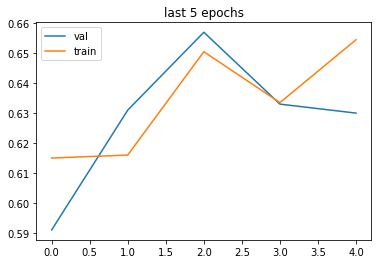

In [31]:
hist = history.history
plt.plot(hist['val_accuracy'][5:10], label='val')
plt.plot(hist['accuracy'][5:10], label='train')
plt.title("last 5 epochs")
plt.legend()


In [47]:
img = load_img(fullname, target_size=(150, 150,3))


In [48]:
x = np.array(img)
x.shape

(150, 150, 3)

In [49]:
x

array([[[183, 154, 122],
        [201, 176, 146],
        [162, 150, 134],
        ...,
        [177, 157, 120],
        [188, 169, 127],
        [202, 180, 139]],

       [[173, 144, 112],
        [200, 175, 145],
        [174, 162, 146],
        ...,
        [167, 147, 110],
        [182, 163, 121],
        [199, 177, 136]],

       [[204, 175, 141],
        [186, 162, 128],
        [149, 138, 120],
        ...,
        [188, 168, 131],
        [182, 163, 123],
        [186, 167, 125]],

       ...,

       [[179, 172, 166],
        [179, 172, 166],
        [182, 175, 169],
        ...,
        [211, 206, 200],
        [210, 205, 199],
        [207, 202, 196]],

       [[185, 178, 172],
        [185, 178, 172],
        [184, 177, 171],
        ...,
        [216, 211, 205],
        [221, 216, 210],
        [220, 215, 209]],

       [[182, 177, 173],
        [182, 177, 173],
        [180, 175, 171],
        ...,
        [204, 199, 193],
        [200, 195, 189],
        [200, 195, 189]]

In [51]:
model.predict(x)

ValueError: in user code:

    File "/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/training.py", line 1572, in predict_step
        return self(x, training=False)
    File "/home/elegant00/.local/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/elegant00/.local/lib/python3.9/site-packages/keras/engine/input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 150, 150, 3), found shape=(None, 150, 3)
